In [1]:
# Importamos las librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# para nuestro proyecto usaremos el archivo Online Retail que encontramos en el url siguiente
# https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

##Source:

Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

##Data Set Information:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

##Attribute Information:

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

In [3]:
retail = pd.read_excel('online_retail_II.xlsx', sheet_name= 'Year 2010-2011')

In [4]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail.shape

(541910, 8)

In [7]:
retail.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Empezamos por ver el numero total de clientes unicos (CustomerID) por pais

retail[['Country', 'Customer ID']].groupby('Country').nunique().sort_values(by='Customer ID', ascending=False)


,Customer ID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [9]:
# Para nuestro proyecto necesitamos gran cantidad de datos, por lo que nos vamos a quedar con los datos que correspondan solo a UK

retail_uk = retail[retail.Country == 'United Kingdom']
retail_uk.reset_index(drop=True, inplace=True)

In [10]:
# visualizamos el head de nuestro dataframe
retail_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# Para nuestro analisis RFM no podemos tener valores missing en la columna de Customer ID, pues es con la que trabajaremos
# Aqui comprobamos y eliminamos dichos valores:
retail_uk.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    133600
Country             0
dtype: int64

In [12]:
retail_uk = retail_uk[retail_uk['Customer ID'].notnull()].reset_index(drop=True)

In [13]:
# aqui volvemos a comprobar que ya no nos quedan valores missing en nuestro dataframe en la columna Customer ID
retail_uk.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [14]:
retail_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# convertiremos Customer ID a int
retail_uk['Customer ID'] = retail_uk['Customer ID'].astype(int)

In [16]:
# comprobamos el cambio
retail_uk['Customer ID'].dtype

dtype('int64')

In [17]:
# Para seguir limpiando los datos, tenemos que comprobar que Quantity y Price no tengan valores negativos, y si los tienen, eliminarlos,
# ya que para nuestra segmentacion no podemos tener valores negativos

In [18]:
retail_uk.describe()

,Quantity,Price,Customer ID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
# Como vemos, la columna Price no tiene valores negativos, pero la columna Quantity si. Eliminamos estos valores.
retail_uk = retail_uk[retail_uk['Quantity']>0]

In [20]:
retail_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 361877
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   Price        354345 non-null  float64       
 6   Customer ID  354345 non-null  int64         
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.3+ MB


In [21]:
# Por ultimo, vamos a crear una columna nueva que se llame Total Spent que multiplique el precio por la cantidad de productos
# Con esto podemos asignar un precio total a cada producto, y facilitar la suma de gasto a cada cliente

In [22]:
retail_uk['Total Spent'] = retail_uk['Quantity'] * retail_uk['Price']

In [23]:
# Creamos una nueva columna que se llame Year Month para que nos agrupe por mes y año
retail_uk['YearMonth'] = retail_uk['InvoiceDate'].dt.strftime('%Y-%m')
retail_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Spent,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


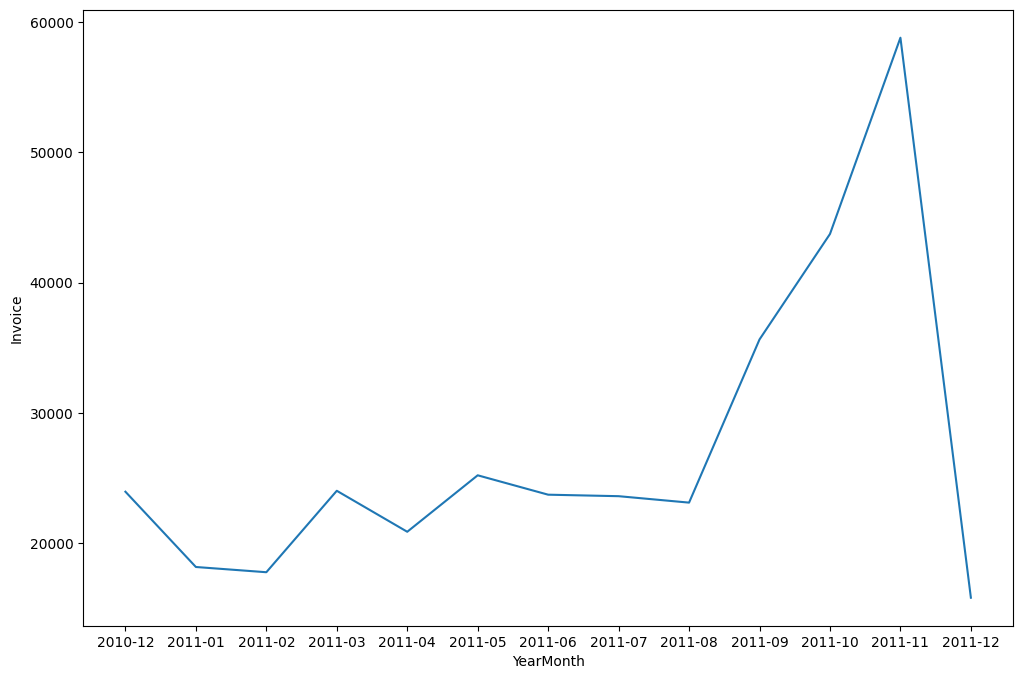

In [24]:
# Mostramos el total de ventas que se han hecho a lo largo del ultimo año
plt.figure(figsize=(12,8))
sns.lineplot(retail_uk.groupby('YearMonth')['Invoice'].count());

<AxesSubplot:xlabel='YearMonth', ylabel='Total Spent'>

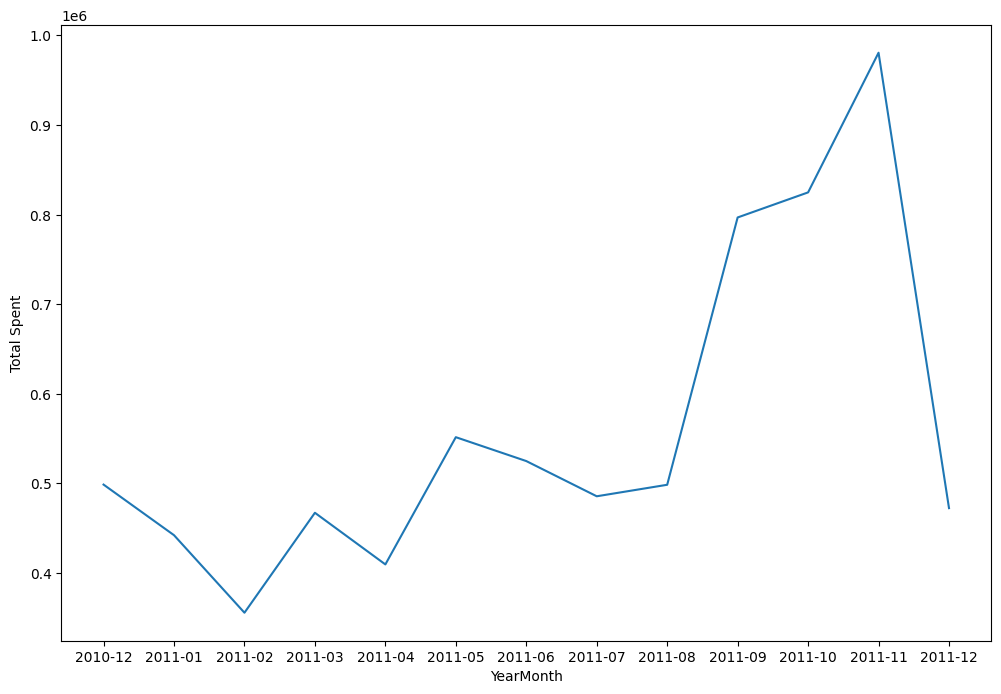

In [25]:
# Mostramos el total recaudado por mes el ultimo año
plt.figure(figsize=(12,8))
sns.lineplot(retail_uk.groupby('YearMonth')['Total Spent'].sum())

In [26]:
# mostramos la fecha mas reciente y menos del dataframe
print('Fecha más reciente: ',retail_uk.InvoiceDate.max().date())
print('Fecha menos reciente: ',retail_uk.InvoiceDate.min().date())


Fecha más reciente:  2011-12-09
Fecha menos reciente:  2010-12-01


In [27]:
# Con los datos que ya tenemos podemos calcular los valores de Recency, Frequency y Monetary para crear un dataframe.

In [28]:
# declaramos el dia mas reciente para calcular la variable recency
dia_mas_reciente = retail_uk.InvoiceDate.max().date()

# creamos las funciones para calcular el RFM
recency = lambda x: dia_mas_reciente - x.max().date()
frequency = lambda x : len(x.unique())
monetary = lambda x: sum(x)

In [29]:
# Creamos un diccionario al que le aplicamos las funciones
retail_RFM = retail_uk.groupby('Customer ID').agg({'InvoiceDate': recency,
                                               'Invoice': frequency,
                                               'Total Spent':monetary})

# Convertimos el diccionario a un dataframe
retail_RFM = pd.DataFrame(retail_RFM)
retail_RFM.columns = ['Recency', 'Frequency', 'Monetary']
retail_RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325 days,1,77183.60
12747,2 days,11,4196.01
12748,0 days,210,33719.73
12749,3 days,5,4090.88
12820,3 days,4,942.34


In [30]:
# Cambiamos los datos de Recency para que solo nos muestre los dias transcurridos desde la ultima compra
# Convertimos los dias a formato int para evitar posibles problemas
retail_RFM['Recency'] = retail_RFM['Recency'].dt.days.astype(int)

In [31]:
retail_RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,1,77183.60
12747,2,11,4196.01
12748,0,210,33719.73
12749,3,5,4090.88
12820,3,4,942.34


In [32]:
# Vamos a visualizar en boxplot la distribucion de nuestros datos para localizar los valores outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfac1b7650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfac1b7cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfac1b7390>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfac317410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfac317750>],
 'means': []}

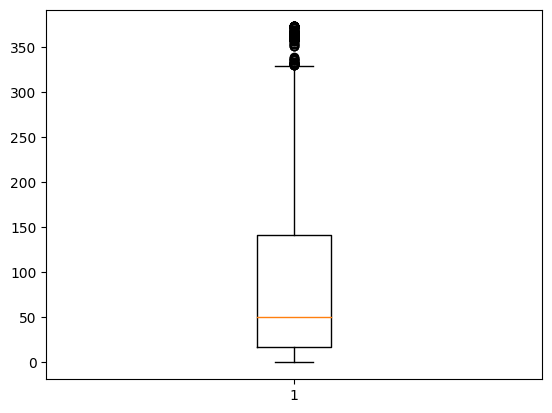

In [33]:
plt.boxplot(retail_RFM['Recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfac342ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfacb85310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfacb7ba50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfacb859d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfacb85d10>],
 'means': []}

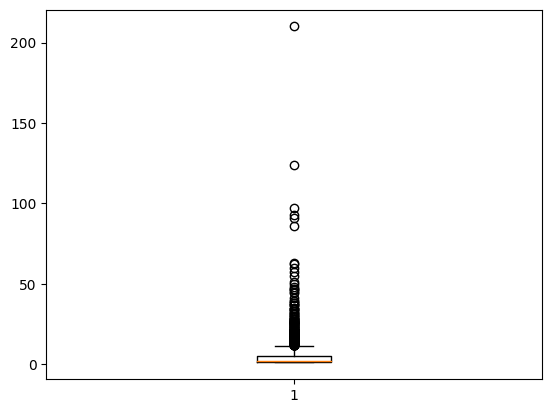

In [34]:
plt.boxplot(retail_RFM['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfad389190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfad3898d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfad3891d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfad3a7050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfad3a7350>],
 'means': []}

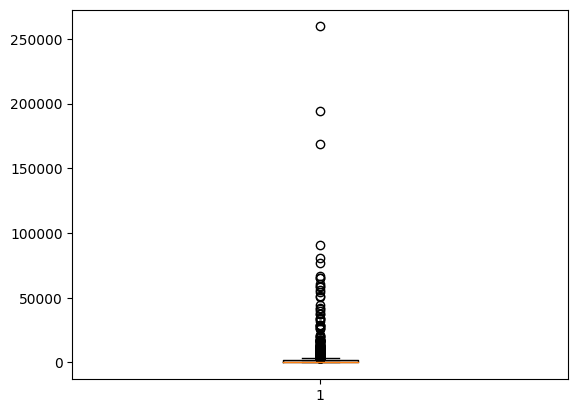

In [35]:
plt.boxplot(retail_RFM['Monetary'])

In [36]:
# Vamos a eliminar de nuestros valores en Frequency y en Monetary aquellos valores que sean mayores de 100 y mayores de 100000 respectivamente
# ya que aun siendo pocos, nos contaminan demasiado los datos

# Ademas, vamos a eliminar los outliers de la columna Recency mayores a 340.

In [37]:
retail_RFM = retail_RFM[(retail_RFM['Frequency'] <= 100) & (retail_RFM['Monetary'] <= 100000) & (retail_RFM['Recency']<=340)]

In [38]:
retail_RFM.describe()

,Recency,Frequency,Monetary
count,3809.000000,3809.000000,3809.000000
mean,84.146495,4.216592,1726.388633
std,89.556600,6.064090,4729.851040
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,306.940000
50%,47.000000,2.000000,668.430000
75%,128.000000,5.000000,1611.590000
max,339.000000,97.000000,91062.380000


In [39]:
# Para aplicar el algoritmo K-Means, nuestros datos tienen que estar normalizados y estandarizados

In [40]:
# Visualizamos primero las distribuciones para ver si tenemos que hacerle algun tipo de tratamiento

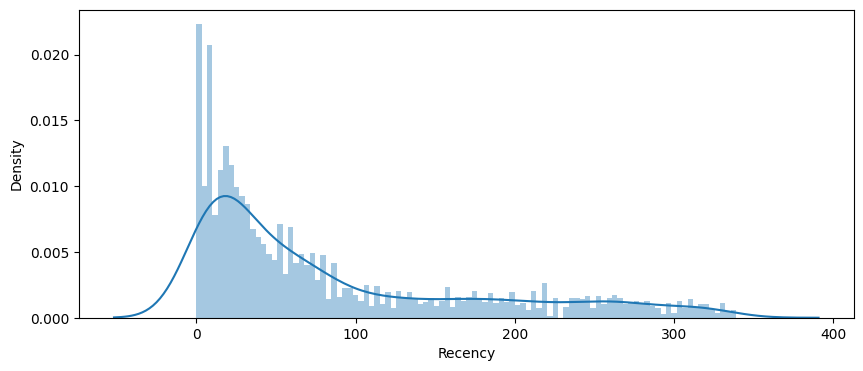

In [41]:
plt.figure(figsize=(10, 4))
sns.distplot(retail_RFM['Recency'], hist= True, bins=100);

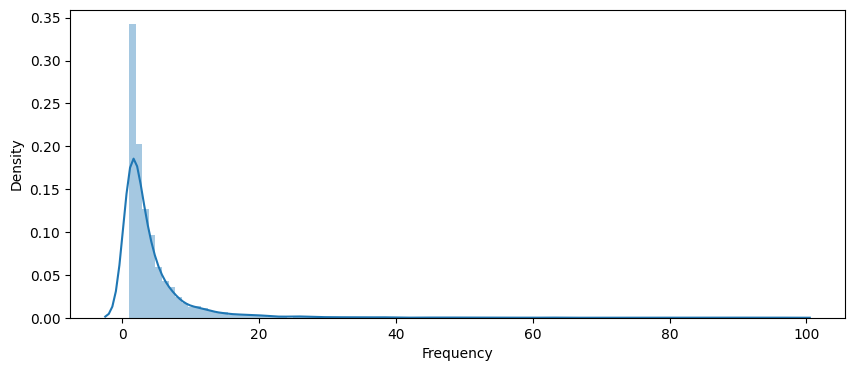

In [42]:
plt.figure(figsize=(10, 4))
sns.distplot(retail_RFM['Frequency'], hist= True, bins=100);

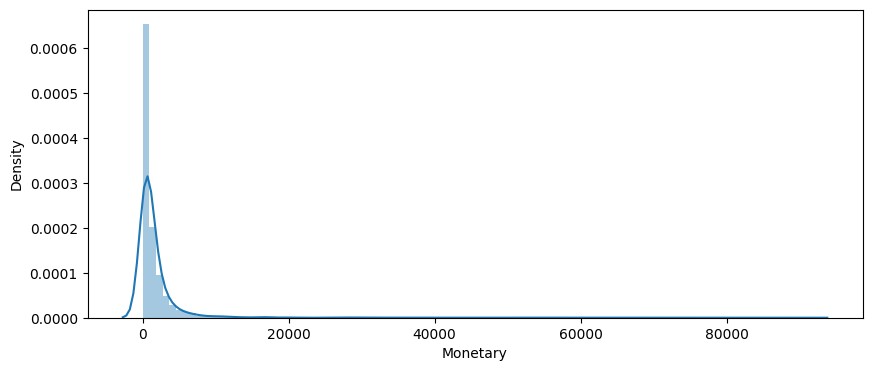

In [43]:
plt.figure(figsize=(10, 4))
sns.distplot(retail_RFM['Monetary'], hist= True, bins=100);

In [44]:
# Como nuestras distribuciones son muy asimetricas, necesitaremos un metodo que normalice la distribucion de nuestros datos
# Probamos dos preprocesadores que nos normalicen los datos y los representamos graficamente

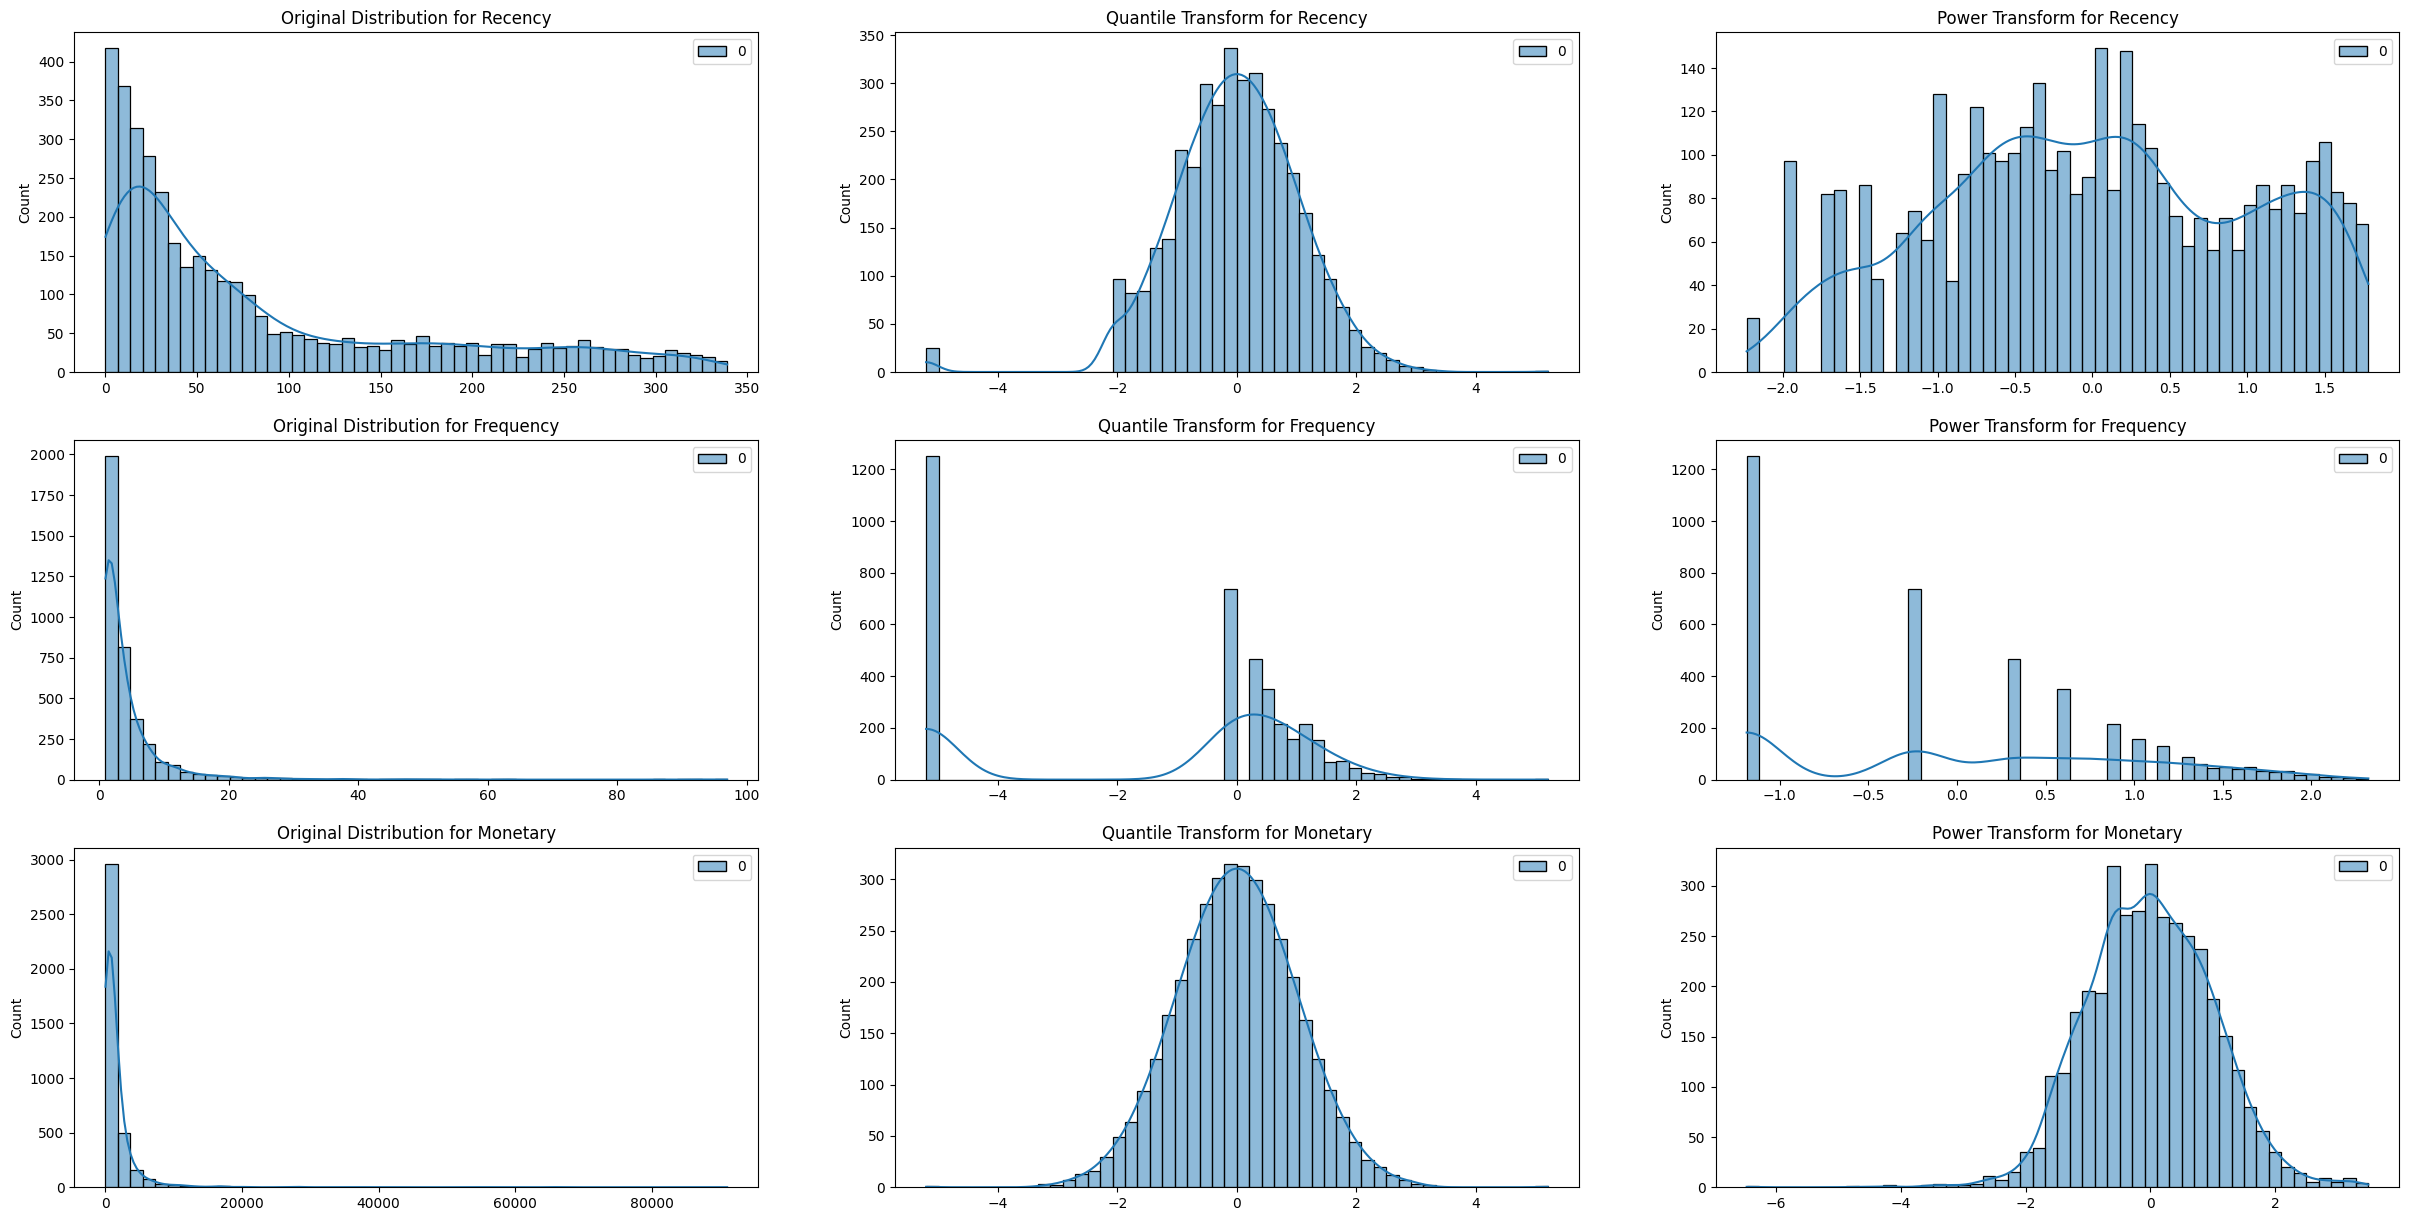

In [45]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

columnas = ["Recency", "Frequency", "Monetary"]

def test_transformers(df, columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(30,15))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3

test_transformers(retail_RFM,columnas)

In [46]:
# Probamos con Power Transformer con el parametro standarize en True para ahorrarnos posteriormente el paso de estandarizar los datos
from scipy.stats import skew
pt = PowerTransformer(standardize=True)

trans_normal = pt.fit_transform(retail_RFM.copy())

skew(trans_normal)


array([-0.0647997 ,  0.1968272 , -0.01472443])

In [47]:
#los datos ya estandarizados
trans_normal

array([[ 1.73553588, -1.18668205,  3.39448323],
       [-1.73948307,  1.52738448,  1.41187875],
       [-1.59494734,  0.86320308,  1.39312497],
       ...,
       [-1.21709626, -0.23552695, -1.14028178],
       [-1.59494734,  1.75425522,  0.88864639],
       [-0.09833297,  0.28823059,  0.78749148]])

In [48]:
# Creamos dataframe definitivo al que ya se le puede aplicar el algoritmo de clasificacion
RFM_seg = retail_RFM.copy()
RFM_seg['Recency'] = trans_normal[:,0]
RFM_seg['Frequency'] = trans_normal[:,1]
RFM_seg['Monetary'] = trans_normal[:,2]
RFM_seg.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,1.735536,-1.186682,3.394483
12747,-1.739483,1.527384,1.411879
12749,-1.594947,0.863203,1.393125
12820,-1.594947,0.625468,0.261059
12821,1.306956,-1.186682,-1.723005


In [49]:
# Importamos el algoritmo desde sklearn
from sklearn.cluster import KMeans

# Creamos una instancia del algoritmo y le pasamos los clusters que queremos para la segmentacion
kmeans = KMeans(n_clusters=7, random_state=42)

# Ponemos en marcha nuestro modelo
etiquetas = kmeans.fit_predict(RFM_seg)

In [50]:
etiquetas

array([2, 3, 3, ..., 4, 3, 2], dtype=int32)

In [51]:
# Comprobamos que se hayan generado tantas etiquetas como clientes
print(len(RFM_seg))
print(len(etiquetas))

3809
3809


In [52]:
# Este metodo nos devuelve la posicion de los centroides de cada cluster
kmeans.cluster_centers_

array([[ 1.34704806, -1.10935237, -1.09273772],
       [-0.87235063,  0.24337255,  0.06527476],
       [-0.03301982,  0.90611736,  0.86625681],
       [-1.31360639,  1.48245395,  1.42664565],
       [-0.38493758, -0.98643318, -1.18722707],
       [ 0.7518201 ,  0.0524338 , -0.07978265],
       [ 0.37364534, -1.18668205, -0.21830561]])

In [53]:
# Este metodo la inercia
kmeans.inertia_

# Lo que nos iteresa es que la inercia sea lo mas baja posible (ya que lo que nos devuelve es la suma de las distancias hacia los centroides)
# Asi que vamos a probar otros parametros para el modelo para refinarlo

2218.7307706334936

In [54]:
# El score de este modelo es el negativo de la inercia, es por eso que debemos buscar el valor mas alto cuando tratemos de refinar el modelo
kmeans.score(RFM_seg)

-2218.7307706334936

In [55]:
# Para elegir el numero de clusters mas adecuados podemos visualizarlo con el metodo del codo ('Elbow method') teniendo en cuenta la inercia
inertia = []

for k in range(2,15):
    
    modelo = KMeans(n_clusters=k)
    
    modelo.fit(RFM_seg)
    inertia.append(modelo.inertia_)

In [56]:
inertia

[5464.140756218846,
 4205.614740526077,
 3321.9480270269614,
 2791.241064508805,
 2423.2400453210353,
 2207.4137201548037,
 2001.5089479346602,
 1848.1578907021496,
 1701.050763489006,
 1583.7449936291969,
 1462.9465892380363,
 1388.4453307718102,
 1319.4992566260692]

Text(0, 0.5, 'Inertia')

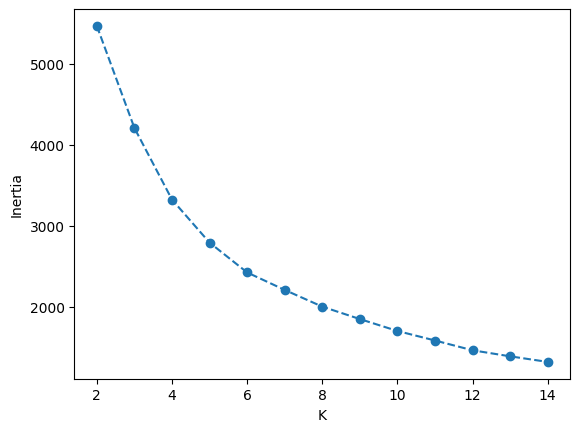

In [57]:
plt.plot(range(2,15),inertia,'o--')
plt.xlabel("K")
plt.ylabel("Inertia")

In [58]:
# Como sabemos, la inercia no es el unico criterio que podemos seguir para elegir el mejor modelo,
# pues el grafuco nos muestra que a mas clusters mas baja es
# Vamos a comprobar la silueta de nuestros modelos para decantarnos por el numero de cluster optimo

In [59]:
# importamos la metrica de la libreria
from sklearn.metrics import silhouette_score

In [60]:
silhouette_score(RFM_seg, kmeans.labels_)

0.3071791040856321

In [61]:
# Calculamos los silhouette scores con un bucle for para ver mas facilmente sus valores
silhouette_scores = []

for k in range(2,15):
    modelo = KMeans(n_clusters=k)
    modelo.fit(RFM_seg)
    silhouette_scores.append(silhouette_score(RFM_seg, modelo.labels_))

silhouette_scores

[0.4296621828126381,
 0.326877796330704,
 0.3262088970134796,
 0.3213971126772347,
 0.31887490364501425,
 0.3106979523727928,
 0.29528445599329395,
 0.2948016114093818,
 0.2913530530709667,
 0.29412653038576236,
 0.30171760970777545,
 0.3030680063630649,
 0.3039657716645031]

Text(0, 0.5, 'Silhouete scores')

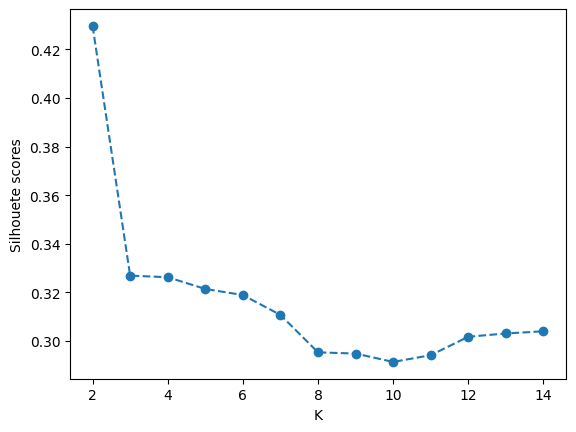

In [62]:
# Representamos los valores de la metrica de silueta en un grafico de codo
plt.plot(range(2,15), silhouette_scores, 'o--')
plt.xlabel("K")
plt.ylabel("Silhouete scores")

# Aqui vemos que el valor maximo es de 0.43 aproximadamente, lo que dignifica esto es que no hay una buena definicion de los clusters,
# incluso en el K mas bajo.

In [63]:
# Como vemos, las metricas de inertia y silhouette score casi que se contradicen,
# por un lado, si queremos bajar la inercia debemos añadir clusters intentando no caer en overfitting (ideal 5-7),
# Por otro, la metrica de silhouette apunta a que a menor numero de k (entre 3 y 6, pues dos no nos seria util) mas definidos estan.

In [64]:
# Esto nos deja con un dilema que resolveremos sopesando las opciones aceptables para el modelo
# y lo mas optimas posible para definir la estrategia de negocio.

In [65]:
# Aplicamos las etiquetas de cada k aplicada al modelo al dataframe de datos escalados

In [66]:
# Vamos a comparar 4, 5 y 6 k (ya que 7 está hecho), componer nuestras etiquetas en el dataframe, y visualizar nuestros datos para comparar

kmeans4 = KMeans(n_clusters=4, random_state=42, max_iter=300)
labels_k4 = kmeans4.fit_predict(RFM_seg)

kmeans5 = KMeans(n_clusters=5, random_state=42, max_iter=300)
labels_k5 = kmeans5.fit_predict(RFM_seg)

kmeans6 = KMeans(n_clusters=6, random_state=42, max_iter=300)
labels_k6 = kmeans6.fit_predict(RFM_seg)


In [67]:
#labels_k4

In [68]:
#labels_k5

In [69]:
#labels_k6

In [70]:
# Con estas etiquetas vamos a crear dataframes con las etiquetas surgidas de cada instancia de k means,
# de modo que podamos visualizar con un snake plot

In [71]:
# Añadimos una columna Customer ID a RFM_seg para no perderla cuando hagamos el melt, ya que nos crea un nuevo indice
RFM_seg['Cust_ID'] = RFM_seg.index

In [72]:
RFM_4k = RFM_seg
RFM_4k['Cluster_4'] = labels_k4

In [73]:
#RFM_4k.head()

In [74]:
# Hacemos un melt al dataframe para usar las metricas como variables categoricas y poder representarlos en un snake plot
# Esto nos facilitara la visualizacion
RFM4_melted = pd.melt(frame= RFM_4k, id_vars= ['Cust_ID','Cluster_4'], var_name = 'Metrics', value_name = 'Value')
RFM4_melted.head()

,Cust_ID,Cluster_4,Metrics,Value
0,12346,0,Recency,1.735536
1,12747,3,Recency,-1.739483
2,12749,3,Recency,-1.594947
3,12820,3,Recency,-1.594947
4,12821,1,Recency,1.306956


In [75]:
# Repetimos el proceso con 5 k 
RFM_5k = RFM_seg.copy()
RFM_5k['Cluster_5'] = labels_k5
RFM_5k.drop('Cluster_4', axis=1, inplace=True)
RFM_5k.head()

,Recency,Frequency,Monetary,Cust_ID,Cluster_5
Customer ID,,,,,
12346,1.735536,-1.186682,3.394483,12346,0
12747,-1.739483,1.527384,1.411879,12747,1
12749,-1.594947,0.863203,1.393125,12749,1
12820,-1.594947,0.625468,0.261059,12820,4
12821,1.306956,-1.186682,-1.723005,12821,2


In [76]:
# Con 6 k 
RFM_6k = RFM_seg.copy()
RFM_6k['Cluster_6'] = labels_k6
RFM_6k.drop('Cluster_4', axis=1, inplace=True)
RFM_6k.head()

,Recency,Frequency,Monetary,Cust_ID,Cluster_6
Customer ID,,,,,
12346,1.735536,-1.186682,3.394483,12346,5
12747,-1.739483,1.527384,1.411879,12747,4
12749,-1.594947,0.863203,1.393125,12749,4
12820,-1.594947,0.625468,0.261059,12820,2
12821,1.306956,-1.186682,-1.723005,12821,1


In [77]:
# Con 7 k
RFM_7k = RFM_seg.copy()
RFM_7k['Cluster_7'] = etiquetas
RFM_7k.drop('Cluster_4', axis=1, inplace=True)
RFM_7k.head()

,Recency,Frequency,Monetary,Cust_ID,Cluster_7
Customer ID,,,,,
12346,1.735536,-1.186682,3.394483,12346,2
12747,-1.739483,1.527384,1.411879,12747,3
12749,-1.594947,0.863203,1.393125,12749,3
12820,-1.594947,0.625468,0.261059,12820,1
12821,1.306956,-1.186682,-1.723005,12821,0


In [78]:
# Ahora ejecutamos los melt
# 5 k
RFM5_melted = pd.melt(frame= RFM_5k, id_vars= ['Cust_ID','Cluster_5'], var_name = 'Metrics', value_name = 'Value')
RFM5_melted.head()

,Cust_ID,Cluster_5,Metrics,Value
0,12346,0,Recency,1.735536
1,12747,1,Recency,-1.739483
2,12749,1,Recency,-1.594947
3,12820,4,Recency,-1.594947
4,12821,2,Recency,1.306956


In [79]:
# 6 k
RFM6_melted = pd.melt(frame= RFM_6k, id_vars= ['Cust_ID','Cluster_6'], var_name = 'Metrics', value_name = 'Value')
RFM6_melted.head()

,Cust_ID,Cluster_6,Metrics,Value
0,12346,5,Recency,1.735536
1,12747,4,Recency,-1.739483
2,12749,4,Recency,-1.594947
3,12820,2,Recency,-1.594947
4,12821,1,Recency,1.306956


In [80]:
#7 k
RFM7_melted = pd.melt(frame= RFM_7k, id_vars= ['Cust_ID','Cluster_7'], var_name = 'Metrics', value_name = 'Value')
RFM7_melted.head()

,Cust_ID,Cluster_7,Metrics,Value
0,12346,2,Recency,1.735536
1,12747,3,Recency,-1.739483
2,12749,3,Recency,-1.594947
3,12820,1,Recency,-1.594947
4,12821,0,Recency,1.306956


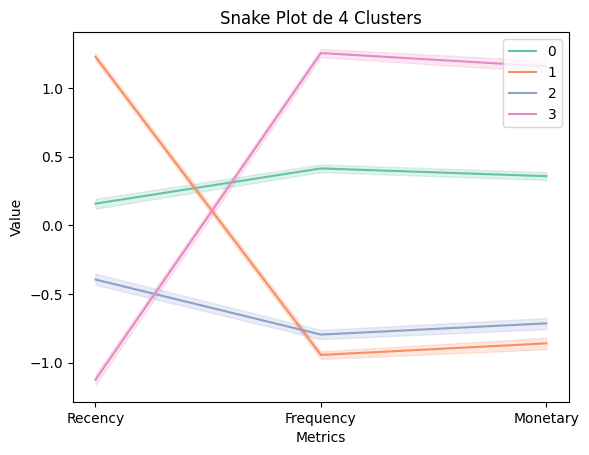

In [81]:
# Visualizamos los snake plots para ver la logica de nuestros clusters
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Cluster_4', data = RFM4_melted, palette='Set2')
plt.title('Snake Plot de 4 Clusters')
plt.legend(loc = 'upper right')

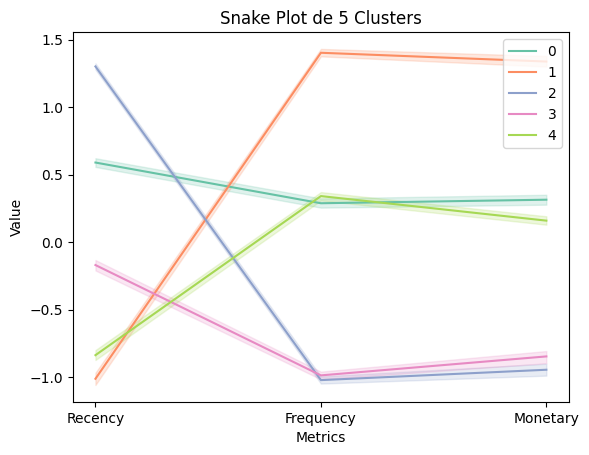

In [82]:
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Cluster_5', data = RFM5_melted, palette='Set2')
plt.title('Snake Plot de 5 Clusters')
plt.legend(loc = 'upper right')

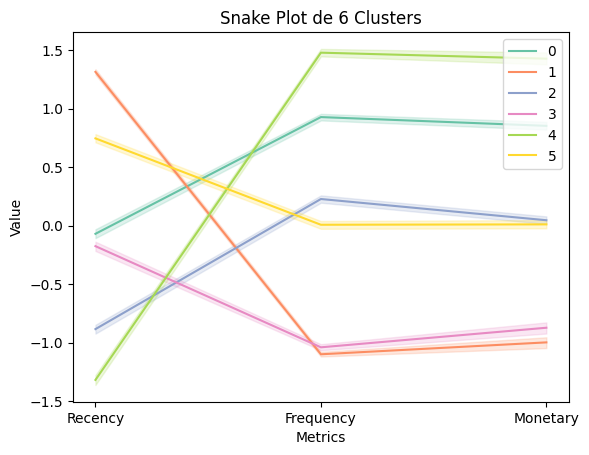

In [83]:
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Cluster_6', data = RFM6_melted,palette='Set2')
plt.title('Snake Plot de 6 Clusters')
plt.legend(loc = 'upper right')

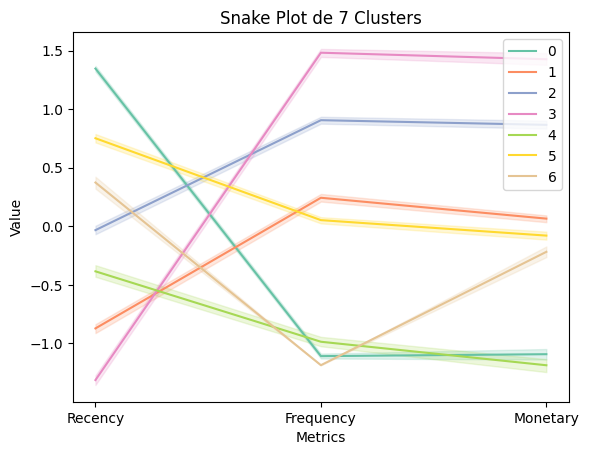

In [84]:
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Cluster_7', data = RFM7_melted,palette='Set2')
plt.title('Snake Plot de 7 Clusters')
plt.legend(loc = 'upper right')

In [85]:
# Parece ser que para que se nos definan bien los clusters, con 4 categorias de clientes serian suficientes, correspondiente con el valor de
# silueta que marcaba nuestro grafico (ya que el primer valor mas alto, es decir 2, no seria adecuado para nuestro fin)

In [86]:
# La manera de definir nuestros clusters quedaría de la siguiente manera:
# Cluster 0: Son los que hace algun tiempo que no vienen, pero tienen una buena relacion frecuency-monetary (Silver)
# Cluster 1: Son los peores clientes, aquellos que no vienen hace mucho, frecuentan poco y gastan poco (Brass)
# Cluster 2: Son los que vinieron hace poco pero no frecuentan ni gastan (Bronze)
# Cluster 3: Son los mejores clientes, pues hace muy poco que compraron, frecuentan mucho el negocio y son los que mas gastan (Gold)

In [87]:
# Con esta categorizacion ya se puede crear una estrategia de negocio para cada tipo de cliente.

In [88]:
# Creamos un nuevo dataframe con las categorias

seg_customers = retail_RFM.copy()
seg_customers['Segmento'] = labels_k4
seg_customers['Segmento'] = seg_customers['Segmento'].replace([0,1,2,3], ['Silver', 'Brass', 'Bronze', 'Gold'])
seg_customers.head()

,Recency,Frequency,Monetary,Segmento
Customer ID,,,,
12346,325,1,77183.60,Silver
12747,2,11,4196.01,Gold
12749,3,5,4090.88,Gold
12820,3,4,942.34,Gold
12821,214,1,92.72,Brass


<AxesSubplot:xlabel='Segmento', ylabel='count'>

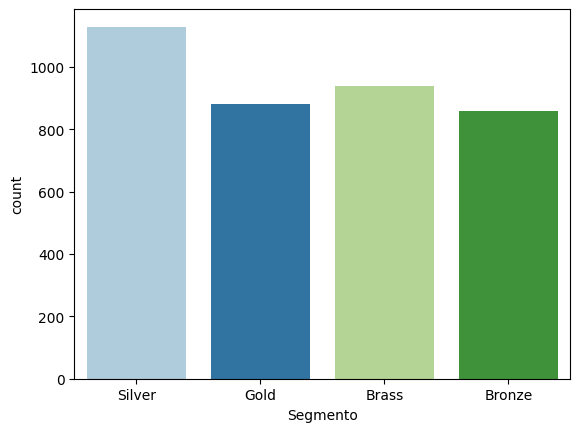

In [89]:
sns.countplot(x=seg_customers['Segmento'], palette='Paired')

In [90]:
seg_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3809.0,84.146495,89.55660,0.0,17.00,47.00,128.00,339.00
Frequency,3809.0,4.216592,6.06409,1.0,1.00,2.00,5.00,97.00
Monetary,3809.0,1726.388633,4729.85104,0.0,306.94,668.43,1611.59,91062.38


In [91]:
sumary = seg_customers.groupby('Segmento').agg({'Recency': 'mean',
                                                'Frequency': 'mean',
                                                'Monetary': ['mean', 'count']}).round(0)
sumary

Recency Frequency Monetary      
            mean      mean     mean count
Segmento                                 
Brass      209.0       1.0    326.0   940
Bronze      35.0       1.0    368.0   859
Gold        12.0      11.0   4958.0   881
Silver      74.0       4.0   1404.0  1129

In [92]:
print('Porcentaje de cada segmento en la muestra:')
(seg_customers['Segmento'].value_counts(normalize=True)*100).round(2)

Porcentaje de cada segmento en la muestra:


Silver    29.64
Brass     24.68
Gold      23.13
Bronze    22.55
Name: Segmento, dtype: float64

In [93]:
# Con estos valores, ahora podemos aplicar un modelo de ML supervisado y comprobar sus métricas
# Usaremos el dataframe transformado y escalado de RFM_4k para no tener que preprocesar de nuevo

RFM_4k.drop('Cust_ID', axis=1, inplace=True)
RFM_4k.head()

,Recency,Frequency,Monetary,Cluster_4
Customer ID,,,,
12346,1.735536,-1.186682,3.394483,0
12747,-1.739483,1.527384,1.411879,3
12749,-1.594947,0.863203,1.393125,3
12820,-1.594947,0.625468,0.261059,3
12821,1.306956,-1.186682,-1.723005,1


In [94]:
# importamos los modelos y el GridSearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [95]:
# Como los arboles de clasificación no se basan en distancias, pero la regresion logistica sí,
# usaremos el dataframe de los datos transformados y estandarizados para el modelo

# Dividimos los datos en X e y
X = RFM_4k.drop('Cluster_4', axis=1)
y = RFM_4k.Cluster_4

# Importamos train_test_split
from sklearn.model_selection import train_test_split

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Creamos las instancias para cada modelo
log_reg = LogisticRegression()

tree = DecisionTreeClassifier()

randfor = RandomForestClassifier()



# Definimos las combinaciones de hiperparámetros para cada uno
grid_log_reg = {'penalty': ['l1', 'l2'],
                'C': np.arange(0.1, 3, 0.5),
                'class_weight': ['balanced']}

grid_tree = {'max_depth': list(range(2,10)),
             'class_weight': ['balanced']}

grid_randfor = {'n_estimators': [100, 120, 200],
                'max_depth': list(range(2,10)),
                'max_features': ["sqrt",2, 3],
                'min_samples_leaf': [10,15],
                'class_weight': ['balanced']}

In [97]:
# Hacemos una lista de tuplas con los modelos y sus hiperparámetros
modelos = [('Decision_Tree', tree, grid_tree),
           ('Random_Forest', randfor, grid_randfor),
           ('Log_Regression', log_reg, grid_log_reg)]

# Un diccionario que llenamos con el bucle for
modelos_grid = {}

for i in modelos:
    modelos_grid[i[0]] = GridSearchCV(i[1],
                                          i[2],
                                          cv=5,
                                          scoring="accuracy",
                                          verbose=1,
                                          n_jobs=-1)
    
    modelos_grid[i[0]].fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [98]:
best_grids = [(i, j.best_score_) for i, j in modelos_grid.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
2,Log_Regression,0.988183
1,Random_Forest,0.967505
0,Decision_Tree,0.959302


In [111]:
modelos_grid['Log_Regression'].best_params_

{'C': 2.6, 'class_weight': 'balanced', 'penalty': 'l2'}

In [112]:
#modelos_grid['Random_Forest'].best_params_

In [113]:
y_pred = modelos_grid['Log_Regression'].best_estimator_.predict(X_test)

In [114]:
modelos_grid['Log_Regression'].best_estimator_.score(X_test, y_test)

0.9855643044619422

In [115]:
#y_pred = modelos_grid['Random_Forest'].best_estimator_.predict(X_test)

In [116]:
#modelos_grid['Random_Forest'].best_estimator_.score(X_test, y_test)

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [118]:
print(accuracy_score(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

0.9855643044619422

[[220   1   2   2]
 [  0 189   6   0]
 [  0   0 170   0]
 [  0   0   0 172]]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       225
           1       0.99      0.97      0.98       195
           2       0.96      1.00      0.98       170
           3       0.99      1.00      0.99       172

    accuracy                           0.99       762
   macro avg       0.98      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



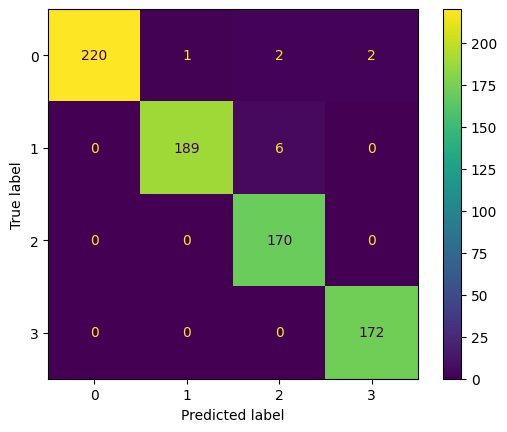

In [119]:
plot_confusion_matrix(modelos_grid['Log_Regression'].best_estimator_, X_test, y_test)

In [120]:
# Guardamos el modelo de regresion logistica
import pickle

with open('RFM_proyecto_log.model', "wb") as archivo_salida:
    pickle.dump(modelos_grid['Log_Regression'].best_estimator_, archivo_salida)

In [ ]:
# Guardamos el modelo de random forest
import pickle

with open('RFM_proyecto.model', "wb") as archivo_salida:
    pickle.dump(modelos_grid['Random_Forest'].best_estimator_, archivo_salida)